In [66]:
import pandas as pd

In [67]:
df=pd.read_excel('AabicToEnglishDatasetTwoClass.xlsx')

In [68]:
df.head()

,Unnamed: 0,Arabic,English,Class
0,0,سيئ جدا بعد الإصدار الجديد,Too bad after the new version,0
1,1,ابلكيشن زباله بجد,Really rubbish application,0
2,2,سيئ التطبيق لايعمل,Bad app not working,0
3,3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,"Unfortunately, for the worst, the application ...",0
4,4,التحديث بطيئ جدا جدا عند الفتح,The update is very slow when opening,0


In [69]:
## Get the Dependent features
X=df['English']
y=df['Class']

In [70]:
X.shape

(449,)

In [71]:
y.shape

(449,)

In [72]:
import tensorflow as tf

In [73]:
tf.__version__

'2.9.1'

In [74]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [75]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [76]:
myData=X.copy()

In [77]:
myData

0                          Too bad after the new version
1                             Really rubbish application
2                                    Bad app not working
3      Unfortunately, for the worst, the application ...
4                   The update is very slow when opening
                             ...                        
444                     Wonderful, and good luck, Lord ⚘
445         May I know when the order will be delivered?
446                  Very cool, but there is no discount
447                                            Excellent
448                                                  Wow
Name: English, Length: 449, dtype: object

In [78]:
onehot_repr =[]
for w in myData :
    onehot_repr.append(one_hot(w,voc_size))
print(onehot_repr)


[[4718, 3630, 2173, 2134, 1254, 1203], [1142, 1672, 2489], [3630, 3722, 3927, 2085], [18, 3991, 2134, 778, 2134, 2489, 1946, 2039, 3678, 4081, 3757, 4773, 3475, 2358, 3394, 4995, 3757, 3340, 3927, 4222, 3633, 4624, 3197, 3757, 4624, 1447, 3927, 197, 368, 2134, 3378, 156, 344, 4624], [2134, 2486, 3394, 2039, 3763, 4777, 2054], [4744, 2358, 400, 2173, 2134, 700, 2486, 2358, 1033, 663, 3757, 2358, 1140, 1981, 2011, 4624, 2896, 2708, 2134, 2760, 2770, 3553, 1891, 2924, 2134, 2489, 2320, 3039, 1580, 4154, 344, 1324, 3388, 18], [2134, 2489, 3340, 3927, 3349, 4241, 1, 4531, 592, 4544, 344, 2712, 3958, 2358, 3340, 3927, 4222, 2764, 3991, 1503, 633, 4531, 614, 3938], [18, 2358, 3394, 2039, 3630, 3861, 1362, 4531, 614, 3253, 344, 4956, 2358, 4531, 4288, 2773, 3378, 3757, 2370, 2013, 3875, 2358, 3757, 4895, 2358, 498, 2358, 156, 4534, 2678, 2486, 3757, 2134, 4919, 4358, 4470, 3927, 3215, 3441], [3917, 4052, 2130], [2039, 3630], [3630, 2489, 3553, 2048, 3394, 1298, 2245, 4624], [18, 2358, 3340, 39

### Embedding Representation

In [79]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2134 1254 1203]
 [   0    0    0 ... 1142 1672 2489]
 [   0    0    0 ... 3722 3927 2085]
 ...
 [   0    0    0 ... 3394 4249  200]
 [   0    0    0 ...    0    0 1744]
 [   0    0    0 ...    0    0 4504]]


In [80]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4718, 3630, 2173, 2134, 1254, 1203])

In [81]:
## Creating model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#model1.add(Bidirectional(LSTM(100)))
model1.add(LSTM(100))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 40)            200000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
len(embedded_docs),y.shape

(449, (449,))

In [83]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
Y = encoder.transform(y)

In [84]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(Y)

In [85]:
X_final.shape,y_final.shape

((449, 30), (449,))

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [87]:
### Finally Training
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=20)

Epoch 1/10
15/15 [==============================] - 3s 57ms/step - loss: 0.6860 - accuracy: 0.5700 - val_loss: 0.6774 - val_accuracy: 0.6309
Epoch 2/10
15/15 [==============================] - 0s 17ms/step - loss: 0.6559 - accuracy: 0.6300 - val_loss: 0.6472 - val_accuracy: 0.6510
Epoch 3/10
15/15 [==============================] - 0s 18ms/step - loss: 0.5896 - accuracy: 0.6833 - val_loss: 0.6138 - val_accuracy: 0.6443
Epoch 4/10
15/15 [==============================] - 0s 18ms/step - loss: 0.5096 - accuracy: 0.7467 - val_loss: 0.5319 - val_accuracy: 0.7517
Epoch 5/10
15/15 [==============================] - 0s 17ms/step - loss: 0.3886 - accuracy: 0.8567 - val_loss: 0.4763 - val_accuracy: 0.7919
Epoch 6/10
15/15 [==============================] - 0s 18ms/step - loss: 0.2653 - accuracy: 0.8900 - val_loss: 0.4250 - val_accuracy: 0.8121
Epoch 7/10
15/15 [==============================] - 0s 19ms/step - loss: 0.1701 - accuracy: 0.9733 - val_loss: 0.4046 - val_accuracy: 0.8523
Epoch 8/10
15

### Adding Dropout 

### Performance Metrics And Accuracy

In [88]:
y_pred=model1.predict(X_test)

5/5 [==============================] - 0s 10ms/step


In [89]:
y_pred

array([[5.42936087e-01],
       [9.28767323e-01],
       [8.41621906e-02],
       [9.70030963e-01],
       [1.24511047e-04],
       [1.22232872e-04],
       [1.15214378e-01],
       [6.96237206e-01],
       [9.45415497e-01],
       [8.70361328e-01],
       [4.87469025e-02],
       [2.74346352e-01],
       [9.09217834e-01],
       [8.75132382e-01],
       [8.71564388e-01],
       [8.75435591e-01],
       [7.74334908e-01],
       [9.24620450e-01],
       [8.10417950e-01],
       [9.09629643e-01],
       [1.62738270e-05],
       [1.51915893e-01],
       [1.72622591e-01],
       [1.44731075e-01],
       [2.73874044e-01],
       [7.85374463e-01],
       [2.29179993e-01],
       [1.12098888e-01],
       [4.72541578e-05],
       [6.21931576e-06],
       [5.99863589e-01],
       [6.63341701e-01],
       [3.82790435e-03],
       [7.01115131e-01],
       [3.79955563e-05],
       [8.06036532e-01],
       [9.53215778e-01],
       [3.77960205e-01],
       [9.51465726e-01],
       [8.27217758e-01],


In [90]:
ny_pred = (y_pred > 0.5)


In [91]:
ny_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test,ny_pred)

array([[64, 14],
       [ 6, 65]], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ny_pred)

0.8657718120805369

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ny_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        78
           1       0.82      0.92      0.87        71

    accuracy                           0.87       149
   macro avg       0.87      0.87      0.87       149
weighted avg       0.87      0.87      0.87       149



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


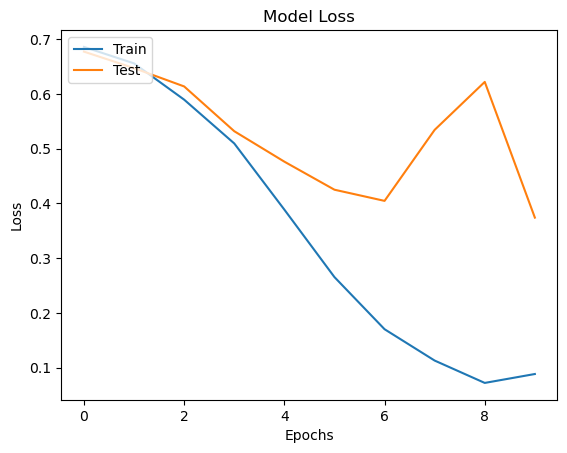

In [96]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.savefig("Loss-Graph.pdf", format="pdf", bbox_inches="tight")
plt.show()
 
  

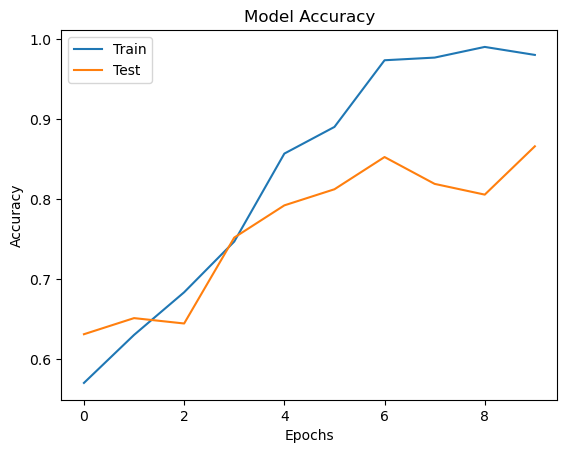

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.savefig("Accuracy-Graph.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [99]:
df = pd.DataFrame(onehot_repr)
df.to_excel("D:\ArabicResult\OneHotEnglish.xlsx")
df = pd.DataFrame(embedded_docs)
df.to_excel("D:\ArabicResult\EmbededEnglish.xlsx")
df = pd.DataFrame(X_train)
df.to_excel("D:\ArabicResult\X_trainEnglish.xlsx")
df = pd.DataFrame(X_test)
df.to_excel("D:\ArabicResult\X_testEnglish.xlsx")
df = pd.DataFrame(y_train)
df.to_excel("D:\ArabicResult\y_trainEnglish.xlsx")
df = pd.DataFrame(y_test)
df.to_excel("D:\ArabicResult\y_testEnglish.xlsx")
df = pd.DataFrame(y_pred)
df.to_excel("D:\ArabicResult\y_predEnglish.xlsx")
df = pd.DataFrame(ny_pred)
df.to_excel("D:\ArabicResult\Yvalue_predEnglishVal.xlsx")

